## IMPORT LIBRARY

In [3]:
import tensorflow as tf
import numpy
import seaborn as sns
from keras.layers import Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## VISUALISASI DATASET

classes: A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A : 305
B : 343
C : 345
D : 348
E : 295
F : 343
G : 347
H : 320
I : 340
K : 325
L : 306
M : 344
N : 332
O : 337
P : 308
Q : 320
R : 337
S : 339
T : 336
U : 316
V : 336
W : 335
X : 330
Y : 328


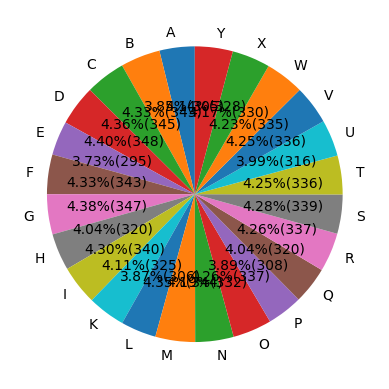

In [4]:
class_names=os.listdir("Train")
print(f"classes: {','.join(class_names)}")
folders = os.listdir('Train')
list=[]
for folder in folders:
    print(f"{folder} : {len(os.listdir(f'Train/{folder}'))}")
    list.append(len(os.listdir(f'Train/{folder}')))
plt.pie(list, labels=class_names, startangle=90,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*sum(list)))
plt.show()

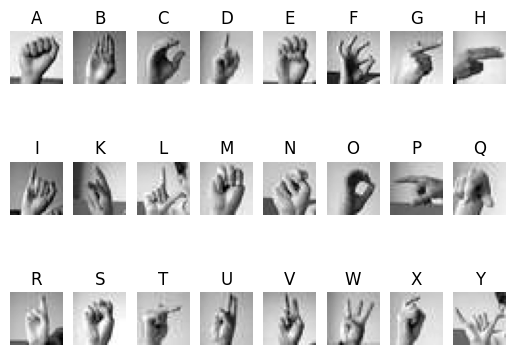

In [5]:
for i,folder in enumerate(folders):
    plt.subplot(3, 8, i + 1)
    plt.title(folder)
    plt.axis('off')
    if ((os.listdir('Train//'+folder)[0])=='.ipynb_checkpoints'):
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[2]}"),cmap="gray")
        pass
    else:
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[0]}"),cmap="gray")
plt.show()

### AUGMENTASI <a name="AUGMENTASI">

In [6]:
def custom_augmentation(np_tensor):
    def gaussian_noise(np_tensor):
        mean = 0
        var = numpy.random.randint(1, 26)
        noise = numpy.random.normal(mean,var**0.5,np_tensor.shape)
        return numpy.clip(np_tensor + noise, 0, 255).astype('float')
    augmnted_tensor = gaussian_noise(np_tensor)
    return numpy.array(augmnted_tensor)
img_datagen=ImageDataGenerator(
            preprocessing_function=custom_augmentation,
            rescale = 1.0/255.,
            rotation_range=20,horizontal_flip=False,
            validation_split=0.3,fill_mode='nearest')

### PREPROCESSING <a name="PREPROCESSING">

In [7]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "Test/",image_size=(128,128),interpolation="nearest", batch_size=24,label_mode='categorical',seed=2,color_mode="grayscale")

Found 3707 files belonging to 24 classes.


In [11]:
train =img_datagen.flow_from_directory(
    'Train',target_size=(128,128),
    batch_size=60,
    shuffle=True,
    class_mode="categorical",
    color_mode="grayscale",
    subset='training')
validation =img_datagen.flow_from_directory(
    'Train',target_size=(128,128),
    batch_size=60,
    shuffle=True,
    class_mode="categorical",
    color_mode="grayscale",
    subset='validation')

Found 5551 images belonging to 24 classes.
Found 2364 images belonging to 24 classes.


## VISUALISASI DATA TRAIN

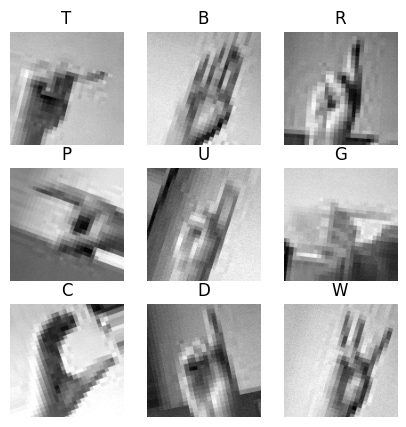

In [12]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img,label=train.next()
    plt.imshow(img[0],cmap="gray")
    plt.title(class_names[tf.argmax(label[0])])
    plt.axis('off')
plt.show()

### MODELLING <a name="MODELLING">

In [13]:
model = tf.keras.Sequential([
#input layer
  tf.keras.layers.Conv2D(128,3,activation='relu', input_shape=(128, 128,1)),
    
#hidden layer
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64,3,activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
    
#output layer
    tf.keras.layers.Dense(len(class_names))])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Save & Fit model <a name="SAVE">

In [16]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer='RMSprop',metrics=['accuracy'])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='Train',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history=model.fit(train,epochs=7,validation_data=validation,callbacks=[model_checkpoint_callback])

Epoch 1/7
93/93 [==============================] - 300s 3s/step - loss: 2.7196 - accuracy: 0.2360 - val_loss: 1.9746 - val_accuracy: 0.3883
Epoch 2/7
93/93 [==============================] - 269s 3s/step - loss: 1.4213 - accuracy: 0.5585 - val_loss: 1.0976 - val_accuracy: 0.6557
Epoch 3/7
93/93 [==============================] - 274s 3s/step - loss: 0.8617 - accuracy: 0.7348 - val_loss: 0.6429 - val_accuracy: 0.8092
Epoch 4/7
93/93 [==============================] - 276s 3s/step - loss: 0.5793 - accuracy: 0.8211 - val_loss: 0.5432 - val_accuracy: 0.8270
Epoch 5/7
93/93 [==============================] - 287s 3s/step - loss: 0.4046 - accuracy: 0.8752 - val_loss: 0.3725 - val_accuracy: 0.8858
Epoch 6/7
93/93 [==============================] - 297s 3s/step - loss: 0.2843 - accuracy: 0.9114 - val_loss: 0.3533 - val_accuracy: 0.8972
Epoch 7/7
93/93 [==============================] - 290s 3s/step - loss: 0.2242 - accuracy: 0.9328 - val_loss: 0.2677 - val_accuracy: 0.9124


In [18]:
model.load_weights('Train')

In [17]:
### EVALUASI <a name="EVALUASI">

In [19]:
evaluasi=model.evaluate(validation,verbose=0)
print(f'Akurasi validation-Set : {evaluasi[1]}')
print(f'Loss validation-Set    : {evaluasi[0]}')

Akurasi validation-Set : 0.9153976440429688
Loss validation-Set    : 0.26948174834251404
